<a href="https://www.kaggle.com/code/hanpat99/liver-patients-classification-bagging-v-boosting?scriptVersionId=140207361" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This is a take home assignment.

# Problem Statement

Download the Liver patient data from the following sources:

https://www.kaggle.com/uciml/indian-liver-patient-records

Use the following 07 features from this dataset:
* Age;
* Total_Bilirubin;
* Direct_Bilirubin;
* Alkaline_Phosphotase;
* Alamine_Aminotransferase;
* Total_Protiens;
* Albumin

Your task is to predict whether a patient suffers from a liver disease using above
features. Split your data into test and train.
First use a random forest algorithm for performing this task.
Then, use a Adaboost Classifier to perform similar task.
Compare the accuracy of these two algorithms.

# 1.0.1 Dataset context

The Indian Liver Patients Dataset is generated from a study done on liver patients in the North East region of Andhra Pradesh, India. This region, where I come from, sees a high rate of alcohol abuse, which is a leading cause of liver health issues.

This region also typically sees males consuming more alcohol than females, so we may expect to see a higher prevalance of liver disorders among males than in females. The feature descriptions are self-explanatory, so let's dive into the addressing the problem at hand.

The problem relates to predicting whether a subject suffers from a liver disease, based on liver function diagnostic results. There are 167 healthy subjects and 416 patients in this dataset, encoded as 2 & 1, respectively. I will train and compare the performances of two different Advanced Machine Learning Classifiers - AdaBoostClassifier and RandomForestClassifier, for this purpose.

# 1.0.2 Workflow:



1. Loading the dataset
2. Preprocessing and EDA: Missing Values handling, Feature Engineering
3. Model Training, Hyperparameter Tuning and Evaluation
4. Conclusion: Comparison of Estimators




# 1.1 Import block and loading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plot style
sns.set(color_codes=True)
%matplotlib inline
plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

###### Deactivate this code block if you are not running it in Google Colab

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/


In [3]:
liv = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')

In [4]:
liv.rename(columns = {'Dataset':'liver_disease_YN'}, inplace =True)

In [5]:
df = liv.copy()

# 1.2  Preprocessing and EDA: Missing Values handling, Feature Engineering

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease_YN            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**# features to be dropped according to the problem statement, before model fitting**
1. `Gender`
2. `Albumin_and_Globulin_Ratio`
3. `Aspartate_Aminotransferase`

I will retain `Gender` for EDA purposes and only drop the other two. `Gender` feature in  health datasets like this can reveal interesting insights about the kind of data we have and the relations between feature themselves. I'll drop it before model fitting.

In [7]:
df = df.drop(['Albumin_and_Globulin_Ratio', 'Aspartate_Aminotransferase'], axis = 1)

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,liver_disease_YN
count,583.000,583.000,583.000,583.000,583.000,583.000,583.000,583.000
mean,44.746,3.299,1.486,290.576,80.714,6.483,3.142,1.286
std,16.190,6.210,2.808,242.938,182.620,1.085,0.796,0.452
min,4.000,0.400,0.100,63.000,10.000,2.700,0.900,1.000
25%,33.000,0.800,0.200,175.500,23.000,5.800,2.600,1.000
50%,45.000,1.000,0.300,208.000,35.000,6.600,3.100,1.000
75%,58.000,2.600,1.300,298.000,60.500,7.200,3.800,2.000
max,90.000,75.000,19.700,2110.000,2000.000,9.600,5.500,2.000


In [9]:
df.liver_disease_YN.value_counts() #416 diseased and 167 healthy

1    416
2    167
Name: liver_disease_YN, dtype: int64

#### Duplicates

In [10]:
df.duplicated().sum()

13

In [11]:
df[df.duplicated()== True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,liver_disease_YN
19,40,Female,0.900,0.300,293,232,6.800,3.100,1
26,34,Male,4.100,2.000,289,875,5.000,2.700,1
34,38,Female,2.600,1.200,410,59,5.600,3.000,2
55,42,Male,8.900,4.500,272,31,5.800,2.000,1
62,58,Male,1.000,0.500,158,37,7.200,3.600,1
106,36,Male,5.300,2.300,145,32,5.100,2.600,2
108,36,Male,0.800,0.200,158,29,6.000,2.200,2
138,18,Male,0.800,0.200,282,72,5.500,2.500,1
143,30,Male,1.600,0.400,332,84,5.600,2.700,1
158,72,Male,0.700,0.100,196,20,5.800,2.000,1


Since there is no unique patient identifier against each observation, and since it is highly improbable that two subjects have the same exact feature values, its safe to say that these records are possibly duplicates. I will remove these.

In [12]:
df = df.drop_duplicates().reset_index().drop('index', axis = 1)

#### Missing Values

In [13]:
df.isna().sum()

Age                         0
Gender                      0
Total_Bilirubin             0
Direct_Bilirubin            0
Alkaline_Phosphotase        0
Alamine_Aminotransferase    0
Total_Protiens              0
Albumin                     0
liver_disease_YN            0
dtype: int64

#### Feature encoding the Gender feature and the Target.

In [14]:
## Feature encoding
gender_replace_dict = {'Male':0, 'Female':1}
df.replace(gender_replace_dict, inplace = True)

## Original dataframe has 1 & 2 encoding for whther a subject has liver disease or not, respecively.
## I will change this into a binary 0 & 1 feature
target_replace_dict = {1:1, 2:0}
df['liver_disease_YN'].replace(target_replace_dict, inplace = True)

### Outlier Handling

I've initially considered 2 possible strategies for outlier handling:

1. **Log Normalization** to reduce skewness in data
2. **Dropping rows with outliers** : This strategy is sub-optimal if used on the entire dataset, since I'm going to use StratifiedKFold for cross-validation.

I will go ahead with log-normalization.

In [15]:
df_outliers = df.copy()

**Log Normalization**

In [16]:
df.skew()

Age                        -0.047
Gender                      1.185
Total_Bilirubin             4.869
Direct_Bilirubin            3.188
Alkaline_Phosphotase        3.728
Alamine_Aminotransferase    6.695
Total_Protiens             -0.311
Albumin                    -0.061
liver_disease_YN           -0.940
dtype: float64

#### Some features like `Total_Bilirubin`, `Direct_Bilirubin`, `Alkaline_Phosphotase`, `Alamine_Aminotransferase` are heavily skewed to the right, probably due to outliers. Lets log-normalize these features to improve model performance.

Skewness of log transformed features:
log_Total_Bilirubin :	 1.7314383064442538
log_Direct_Bilirubin :	 1.6895992041699643
log_Alkaline_Phosphotase :	 1.3263973386022474
log_Alamine_Aminotransferase :	 1.4706642266392174


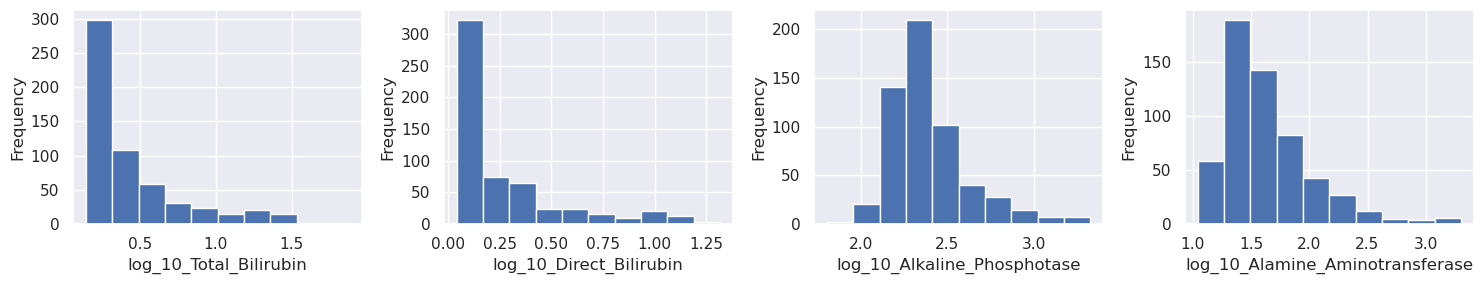

In [17]:
## Adding new log transformed features and visualizing their distributions

skewed_features = ['Total_Bilirubin',\
                   'Direct_Bilirubin', \
                   'Alkaline_Phosphotase', \
                   'Alamine_Aminotransferase']

fig = plt.figure(figsize=(15,3))

print('Skewness of log transformed features:')
for idx, feature in enumerate(skewed_features):
    new_name = f'log_{feature}'
    df[new_name] = np.log10(df[feature]+1) #add 1 to features with 0 values to prevent -np.inf during log transform
    print(new_name, ':\t', df[new_name].skew())

    sub = fig.add_subplot(1,4,idx+1)
    sub.set_xlabel(f'log_10_{feature}')
    df[new_name].plot(kind='hist')
    plt.tight_layout()

In [18]:
df = df.drop(skewed_features, axis = 1)

# 1.2.1 Univariate Analysis

In [19]:
df.columns

Index(['Age', 'Gender', 'Total_Protiens', 'Albumin', 'liver_disease_YN',
       'log_Total_Bilirubin', 'log_Direct_Bilirubin',
       'log_Alkaline_Phosphotase', 'log_Alamine_Aminotransferase'],
      dtype='object')

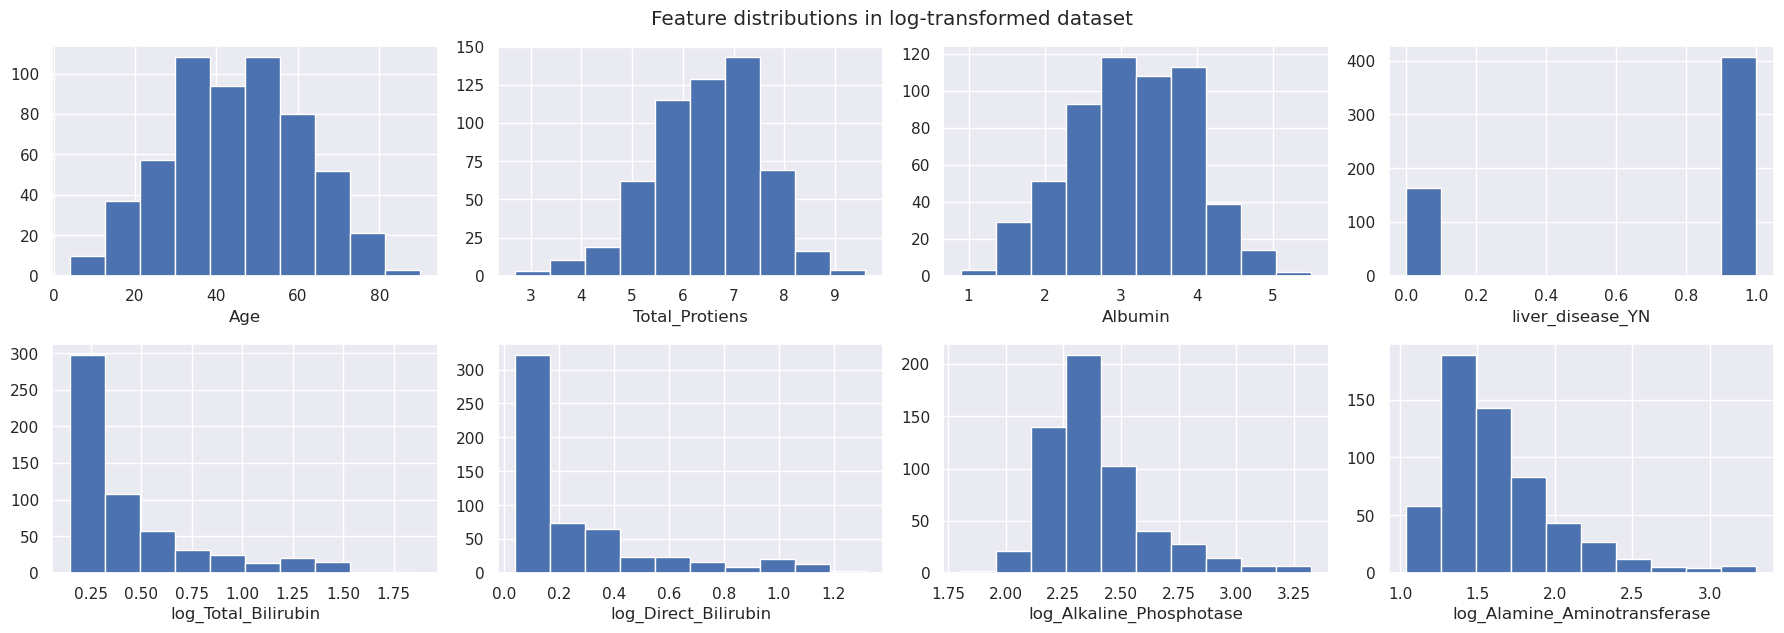

In [20]:
## Lets visualize the distributions of our features

fig = plt.figure(figsize = (18,12))

for idx, feature in enumerate(df.drop('Gender',axis=1).columns):
    sub = fig.add_subplot(4,4,idx+1)
    sub.set_xlabel(feature)
    df[feature].hist()
    plt.tight_layout()
    plt.suptitle('Feature distributions in log-transformed dataset');


#### This is interesting. The following observations can be made from these plots.


1.   The median age of the participants is in the late 40s to early 50s range.
2.   My initial hypothesis was that males in this geographical region have been facing higher amount of liver issues. Let's find out if this is the case in the next set of visualizations.
4. We do not have baseline values for healthy people in the dataset's Kaggle page, nor in the feature descripion. I will attempt to find this out using the groupby function for healthy livers (df.liver_disease_YN == 0).

In [21]:
## Artificial Baseline, Mean (not verified against medical standards)
baseline_avg = df[df.liver_disease_YN == 0].groupby('Gender').mean()
baseline_avg

,Age,Total_Protiens,Albumin,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase
Gender,,,,,,,,
0,40.678,6.544,3.358,0.000,0.317,0.138,2.314,1.492
1,42.837,6.600,3.357,0.000,0.266,0.092,2.279,1.409


In [22]:
df[df.liver_disease_YN == 1].groupby('Gender').mean()

,Age,Total_Protiens,Albumin,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase
Gender,,,,,,,,
0,47.108,6.406,3.016,1.000,0.550,0.347,2.420,1.744
1,43.385,6.692,3.233,1.000,0.424,0.234,2.431,1.588


#### The above *mean values* seems very off, with *significantly different values for Males and Females*. Since mean is susceptible to outliers, lets redo this with median and compare the baseline median values of healthy subjects against subjects with liver disease (df.liver_disease_YN == 1).


In [23]:
## Artificial Baseline, Median (not verified against medical standards)
baseline_median = df[df.liver_disease_YN == 0].groupby('Gender').median()
baseline_median

,Age,Total_Protiens,Albumin,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase
Gender,,,,,,,,
0,41.000,6.500,3.500,0.000,0.255,0.079,2.272,1.462
1,41.000,6.800,3.300,0.000,0.255,0.079,2.276,1.398


In [24]:
df[df.liver_disease_YN == 1].groupby('Gender').median()

,Age,Total_Protiens,Albumin,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase
Gender,,,,,,,,
0,47.000,6.500,3.000,1.000,0.431,0.255,2.367,1.653
1,45.000,6.800,3.300,1.000,0.279,0.079,2.307,1.447


#### Observations:
1. A simple visual comparison between the median tables reveals that in general, people with liver issues have higher feature medians than those with healthy livers, for both genders.
2. For healthy test subjects, feature values remain largely equal for both genders.
3. The median age for subjects with liver disease is higher for both genders.
4. Females in the are susceptible to liver disease at a younger age than males.
5. On a whole, this seems to indicate that older population in the region are more susceptible to liver disease. Does this mean younger people have access to better healthcare or are generally health conscious? Could this be because of poor socio-economic conditions, access to disposable incomes leading to alcohol abuse or shortage of medical services? Need additional data to answer these questions.

#### Let's verify the above observations visually, and understand the distribution of features across the binary groups, Gender and Liver Disease.

{'Male': 0, 'Female': 1}


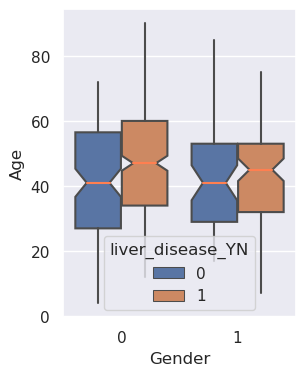

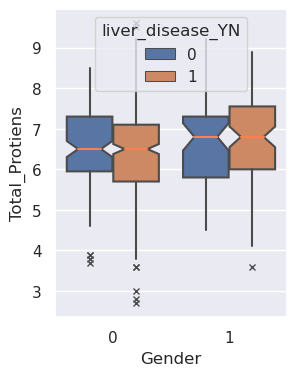

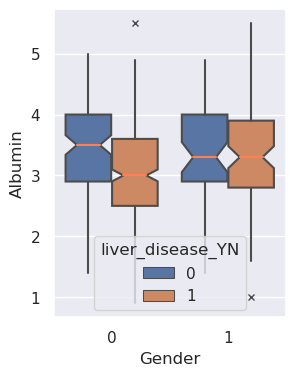

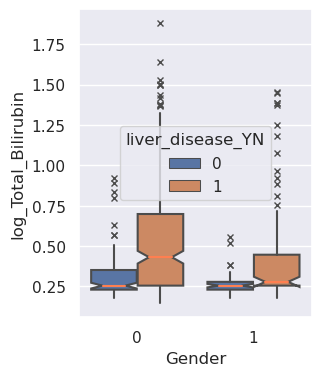

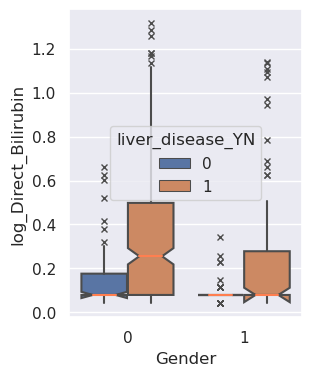

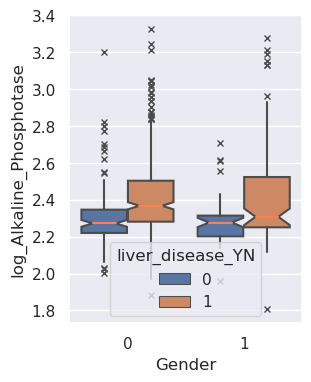

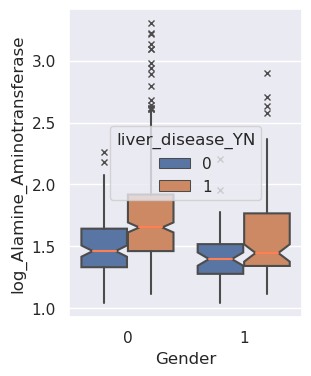

In [25]:
print(gender_replace_dict)

for feature in df.drop(['Gender', 'liver_disease_YN'],axis=1).columns:
    plt.figure(figsize=(3,4))
    sns.boxplot(df, x = 'Gender', y = feature, notch = True, flierprops={"marker": "x"},
                showcaps=False, medianprops={"color": "coral"}, hue = 'liver_disease_YN', dodge = True) #customizing the boxplots
    fig.savefig(f'boxplot_{feature}_gender.png', bbox_inches='tight')
    plt.show();

#### Observations
1. As expected, within each gender, feature medians tend to be higher for those with liver disease as opposed to healthy subjects. An excpetion to this is the feature `Albumin`, where diseased subjects tend to score lower.

2. The feature `Total_Protiens` provides little variance within the gender groups, and across the target. Normally, this can be dropped, but retaining it as per the problem statement.

3. The features `log_direct_bilirubin` and `log_total_bilirubin` show a significant variance across both genders, and higher feature values seem to correspond towards having liver problems. These two features seem to be significant in predicting the liver dysfunction.

4. Apart from these there's too much of an overlap of the Inter Quartile Range of the barplots to infer conclusively, that any of the features influence liver disease for either genders. I suspect a one-way ANOVA test between the named groups would give different insights, so I'll move forward with the analysis.

# 1.2.2 Multivariate Analysis

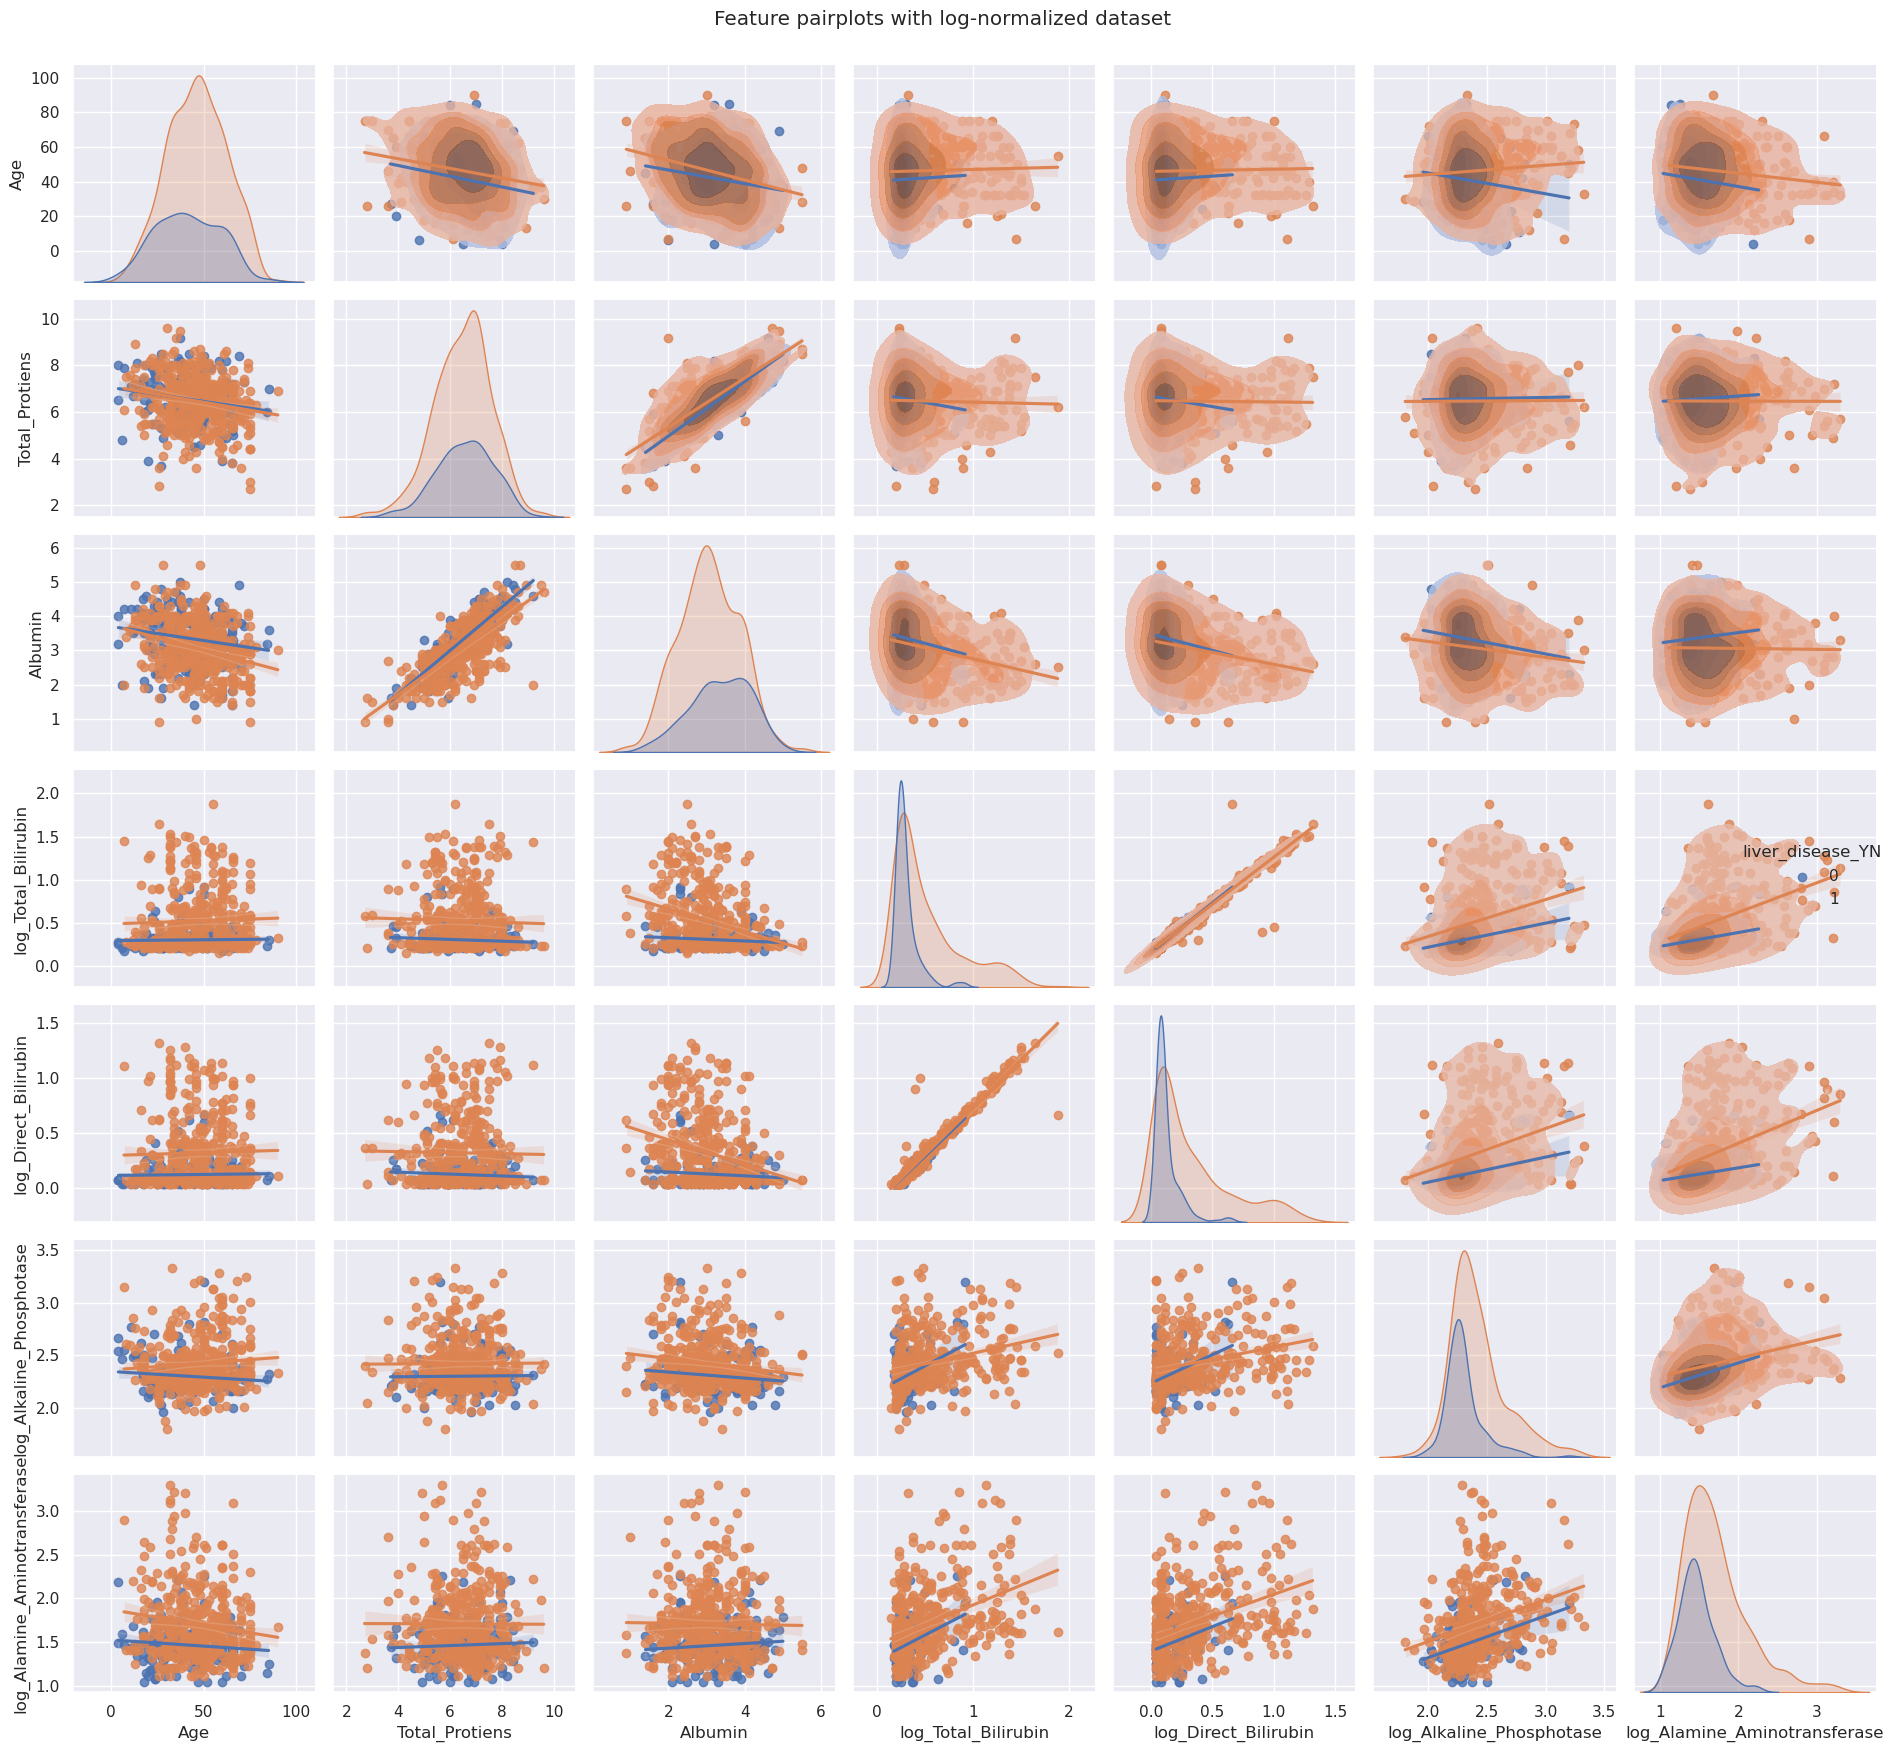

In [26]:
g = sns.pairplot(df.drop('Gender', axis = 1), kind = 'reg', hue = 'liver_disease_YN')
g.map_upper(sns.kdeplot, levels = 6, alpha = 0.8, hue = df['liver_disease_YN'], fill = True)
plt.suptitle('Feature pairplots with log-normalized dataset', y = 1)

plt.savefig('Feature pairplots with log-normalized dataset.png')
plt.tight_layout()
plt.show();

#### The pairplot reveals some interesting trends in the data.
1. Only 2 feature pairs exhibit a strong collinearity.
2. The remaining pairplots do not seem to show any trends.

I will verify this with a correlation map.

In [27]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 10, annot_size=10, annot_kws=10):
    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

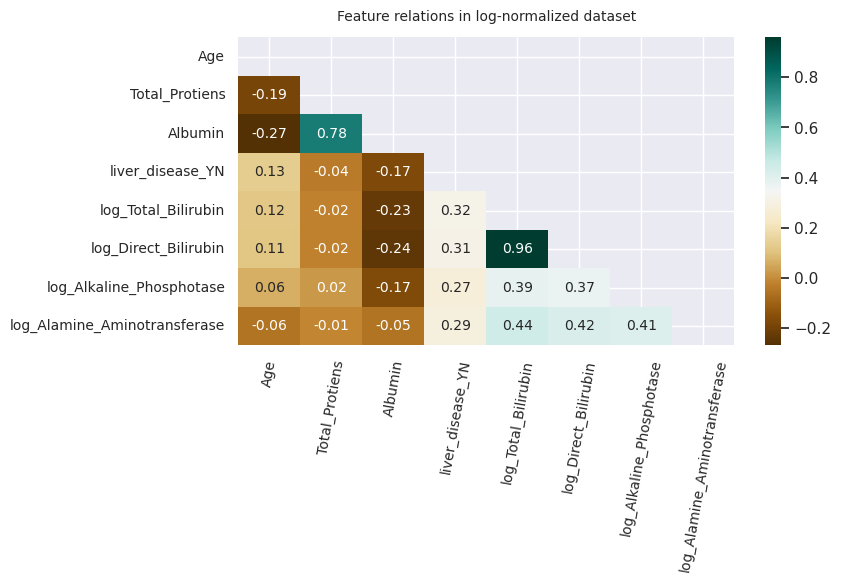

In [28]:
plt.figure(figsize=(8, 4))
corr_map(df.drop('Gender', axis = 1), 'Feature relations in log-normalized dataset')

#### As expected, 2 feature pairs (given below) are strongly correlated, with pair 2 having a near perfect positive correlation of 1.
1. `Albumin` and `Total_Protiens`,
2. `log_Total_Bilirubin` and `log_Direct_Bilirubin` / `Total_Bilirubin` and `Direct_Bilirubin`


### Now that we've cleaned up our dataset and extracted some important insights and engineered the features, we will move on to model training and evaluation.

# 1.3 Model Training, Hyperparameter Tuning and Evaluation

* I will use **AdaBoostClassifier** and **RandomForestClassifier** for this task.

* Instead of train_test_split, I will use **StratifiedKFold** cross validation strategy.

* For hyperparameter tuning, I will use **GridSearchCV**.

In [29]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

**Prepare dataset**

In [30]:
# Log_normalized
X_log_norm = df.drop('liver_disease_YN', axis=1)
y_log_norm = df['liver_disease_YN']

In [31]:
# Initialize StratifiedKFold class
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

**AdaBoost**

In [32]:
## Log Normalized

## Define parameter grids for GridSearchCV for AdaBoost Classifier
adaboost= AdaBoostClassifier()
adaboost_params = {'n_estimators':[205, 210, 215, 220, 225], 'learning_rate':[1.7, 1.75, 1.8, 1.85, 1.9, 2]}

## GridSearchCV for AdaBoost Classifier
ada_grid_log = GridSearchCV(adaboost, adaboost_params, cv = skf, scoring = 'precision', refit = True)
#setting scoing to precision so as to reduce False negatives in disease detection
ada_grid_log.fit(X_log_norm,y_log_norm)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.7, 1.75, 1.8, 1.85, 1.9, 2],
                         'n_estimators': [205, 210, 215, 220, 225]},
             scoring='precision')

In [33]:
print(ada_grid_log.best_estimator_)
print('mean_test_score with log-normalization:\n',ada_grid_log.cv_results_['mean_test_score'])

AdaBoostClassifier(learning_rate=1.85, n_estimators=215)
mean_test_score with log-normalization:
 [0.76621744 0.76436972 0.76999415 0.76725694 0.76857278 0.77527816
 0.76421871 0.76512536 0.76648524 0.75951778 0.7690092  0.76247564
 0.76169073 0.76327037 0.76174577 0.76988579 0.76676662 0.77799645
 0.76440607 0.76514937 0.73787926 0.74917036 0.74650376 0.74713531
 0.74418332 0.7122807  0.39802689 0.7122807  0.39802689 0.7122807 ]


**RandomForest**

In [34]:
## Log Normalized
## Define parameter grids for GridSearchCV for RandomForest Classifier
randomforest = RandomForestClassifier()
rf_params = {'max_depth': [None, 20, 25, 26, 27, 28], 'n_estimators':[200, 210, 215, 220, 225, 230], 'warm_start':[True, False]}

## GridSearchCV for RandomForest Classifier
rf_grid_log = GridSearchCV(randomforest, rf_params, cv = skf, scoring = 'precision', refit = True)
rf_grid_log.fit(X_log_norm,y_log_norm)

print(rf_grid_log.best_estimator_)
print('mean_test_score:\n',rf_grid_log.cv_results_['mean_test_score'])

RandomForestClassifier(n_estimators=200, warm_start=True)
mean_test_score:
 [0.75837922 0.7502948  0.75137494 0.74286947 0.74847099 0.75134654
 0.74948257 0.75218689 0.75204011 0.75014086 0.74755818 0.74733202
 0.75175507 0.75556982 0.75209763 0.75608414 0.75123481 0.75305374
 0.74763727 0.7474458  0.7403987  0.75134203 0.75474984 0.75627694
 0.7502559  0.75024762 0.74370091 0.7518973  0.74638188 0.75437409
 0.75000006 0.74819509 0.74854133 0.74588455 0.74699544 0.74990515
 0.74510381 0.7443857  0.74662476 0.75294833 0.7534279  0.75093268
 0.75017339 0.75267977 0.75297283 0.74990943 0.75016933 0.74779051
 0.75061002 0.74890917 0.74729914 0.74736401 0.74564548 0.75032245
 0.75515855 0.75730678 0.74006035 0.74459073 0.75465708 0.74212511
 0.74838479 0.74824037 0.75727723 0.74509213 0.75643103 0.74940038
 0.74826626 0.74815339 0.74905005 0.74905673 0.75757872 0.74646763]


#### **Model Evaluation**

In [35]:
## Evaluate the models using cross-validation scores
adaboost_log_norm_scores = ada_grid_log.cv_results_['mean_test_score']
rf_log_norm_scores = rf_grid_log.cv_results_['mean_test_score']

## Print the cross-validation scores
print("Cross-validation results for AdaBoostClassifier:")
print(f"Best parameters for Log_normed + AdaBoostClassifier: {ada_grid_log.best_params_}")

print("\nCross-validation results for RandomForestClassifier:")
print("Best parameters for Log_normed +  RandomForestClassifier:", rf_grid_log.best_params_)

Cross-validation results for AdaBoostClassifier:
Best parameters for Log_normed + AdaBoostClassifier: {'learning_rate': 1.85, 'n_estimators': 215}

Cross-validation results for RandomForestClassifier:
Best parameters for Log_normed +  RandomForestClassifier: {'max_depth': None, 'n_estimators': 200, 'warm_start': True}


In [36]:
print('Best Precision score with skewed features log normalized:')
print('AdaBoost:', np.max(adaboost_log_norm_scores))
print('RandomForest', np.max(rf_log_norm_scores))

Best Precision score with skewed features log normalized:
AdaBoost: 0.7779964472413423
RandomForest 0.758379223793558


#### Save the models with joblib

In [37]:
import joblib
joblib.dump(ada_grid_log, 'model_adabost_log.pkl.pkl')
joblib.dump(rf_grid_log, 'model_randomforest_log.pkl.pkl')

['model_randomforest_log.pkl.pkl']

# 1.4 Final Report and Conclusion: Comparison of Estimators
 After multiple rounds of hyperparameter tuning and refitting, we have found that **Adaboost Classifier is marginally better than Random Forest Classifier** on log-normalized features.

 In GridSearchCV for both classifiers, I have chosen the value for **scoring as precision**, since my primary goal is **to minimize false negatives.**

* **Hyperparameter tuning with log normalization** of heavily skewed features for AdaBoost and RandomForest Classifiers has **improved maximum mean precision scores of ~70% when fitted with default parameter values, to the the present maximum mean scores of 78% and 76% respectively.**

There might be a scope for improvement in model scores with a different set of classifier algorithms such as XGBoost, LightGBM, CatBoost.

The **low maximum mean precision of <80% in RandomForest classifier can be explained** by our observation during EDA, of a **significant overlap in the IQR of the boxplots** among features, when grouped by Gender and Liver_disease_YN feature. The **pairplots and correlation heatmaps have reconfirmed** this: the scatters and kde plots show significant overlaps, and low correlation among feature pairs. Additionally, we have only reduced the influence of outliers by log-normalizing feature values instead of dropping them. This might also explain why our model scores don't increase beyond 80%. **IsolationForest** may be used if we want to ignore the effect of outliers.

While there exists **an argument that model precision can be improved by augmenting the data** with synthetic datapoints, I'm not exploring these strategies for the following reasons:
* Firstly, oversampling strategies like ADASYN, SMOTE or SMOTENC may not work as they create point-bridges in the minority target class. We've observed that the minority and majority classes are **embedded deeply inside each other.** This is evident from the pairplots where distinct clusters are not visible. Using these may further deteriorate the predictive power of our model.
* Secondly, **undersampling causes a loss of information** as the dataset is small and so, this strategy is undesirable.
* Lastly, I'm also not considering using the combination srategy of SMOTETomek since this too causes a loss in information in such a small dataset.

If there is less of an overlap between the clusters based on target, *intuition says,* **using BorderlineSMOTE with AdaBoost or its variant, the EasyEnsembleClassifier which uses AdaBoost as the base estimator will give better test precision.**

The **below combinations are recommended** to be tested with different cross-validation strategies for arriving at better estimators and models.

1. SMOTENC + AdaBoostClassifier
2. SMOTENC + RandomForestClassifier,
3. BorderlineSMOTE + AdaBoostClassifier,
4. BorderlineSMOTE + RandomForestClassifier
5. EasyEnsembleClassifier
6. BalancedRandomForestClassifier